<a href="https://colab.research.google.com/github/AliGhadirii/MNIST-digit-classifer/blob/main/2_Mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

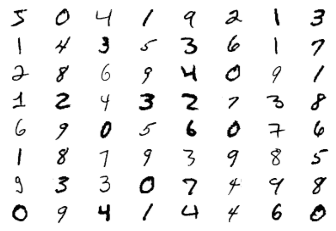

In [3]:
for i in range(64):
  ax = plt.subplot(8,8, i+1)
  ax.axis('off')
  plt.imshow(X_train[i], cmap='Greys')

In [5]:
image_len = np.product(X_train.shape[1:])
X_train = X_train.reshape(X_train.shape[0], image_len)
X_test = X_test.reshape(X_test.shape[0], image_len) 

# Normalize input
X_train = X_train / 255.
X_test = X_test / 255.



num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
                                                  X_train, y_train, 
                                                  test_size = 0.2, 
                                                  random_state = 2021, 
                                                  stratify=y_train)

In [7]:
def callbacks(): 
    return [ 
            EarlyStopping(monitor = 'loss', patience = 6), 
            ReduceLROnPlateau(monitor = 'loss', patience = 3), 
            ModelCheckpoint('Mnist_best_model.hdf5', save_best_only=True)
          ]

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(image_len,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
__________________________________________________

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=2,
                    callbacks=callbacks(),
                    validation_data = (X_val, y_val)
                    )

Epoch 1/40
375/375 - 20s - loss: 0.3248 - accuracy: 0.9022 - val_loss: 0.1298 - val_accuracy: 0.9592
Epoch 2/40
375/375 - 5s - loss: 0.1328 - accuracy: 0.9587 - val_loss: 0.1140 - val_accuracy: 0.9660
Epoch 3/40
375/375 - 5s - loss: 0.0986 - accuracy: 0.9695 - val_loss: 0.0887 - val_accuracy: 0.9732
Epoch 4/40
375/375 - 5s - loss: 0.0776 - accuracy: 0.9753 - val_loss: 0.0811 - val_accuracy: 0.9762
Epoch 5/40
375/375 - 5s - loss: 0.0674 - accuracy: 0.9782 - val_loss: 0.0888 - val_accuracy: 0.9744
Epoch 6/40
375/375 - 5s - loss: 0.0602 - accuracy: 0.9805 - val_loss: 0.0727 - val_accuracy: 0.9783
Epoch 7/40
375/375 - 5s - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 8/40
375/375 - 5s - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0665 - val_accuracy: 0.9803
Epoch 9/40
375/375 - 5s - loss: 0.0412 - accuracy: 0.9862 - val_loss: 0.0779 - val_accuracy: 0.9788
Epoch 10/40
375/375 - 5s - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0674 - val_accuracy: 0.980

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = Y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [18]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.988     0.995     0.991       980
           1      0.993     0.994     0.993      1135
           2      0.985     0.989     0.987      1032
           3      0.980     0.988     0.984      1010
           4      0.987     0.984     0.985       982
           5      0.986     0.980     0.983       892
           6      0.987     0.987     0.987       958
           7      0.980     0.985     0.983      1028
           8      0.988     0.976     0.982       974
           9      0.987     0.980     0.984      1009

    accuracy                          0.986     10000
   macro avg      0.986     0.986     0.986     10000
weighted avg      0.986     0.986     0.986     10000



In [19]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 975    1    1    0    0    0    1    1    1    0]
 [   0 1128    1    1    0    1    2    1    1    0]
 [   1    1 1021    1    1    0    1    5    1    0]
 [   0    0    2  998    0    1    0    4    3    2]
 [   0    0    4    0  966    0    3    2    1    6]
 [   2    0    0    9    1  874    4    0    2    0]
 [   3    2    0    1    2    3  946    0    1    0]
 [   1    2    7    1    0    0    0 1013    2    2]
 [   4    0    1    4    2    5    1    3  951    3]
 [   1    2    0    3    7    2    0    5    0  989]]


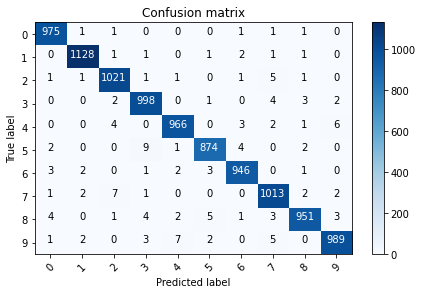

In [20]:
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cm=cm, classes=label_names)